In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
from covid19 import data

In [3]:
df = data.load_cases('state')
data_ceara = df['CE']
data_SP = df['SP']
data_RJ = df['RJ']
data_DF = df['DF']
data_AM = df['AM']

In [4]:
len(data_ceara), len(data_SP)

(35, 35)

In [5]:
data_ceara.columns = [['newCases_CE', 'totalCases_CE']]
data_SP.columns = [['newCases_SP', 'totalCases_SP']]

In [6]:
df = pd.concat([data_ceara, data_SP], axis=1, sort=False)

In [7]:
len(df)

35

In [8]:
df = df.drop(['newCases_CE', 'newCases_SP'], axis=1)
df.tail()

/home/personal-arthur/.local/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,totalCases_CE,totalCases_SP
date,,
2020-04-01,445,2981
2020-04-02,563,3506
2020-04-03,646,4048
2020-04-04,745,4466
2020-04-05,769,4466


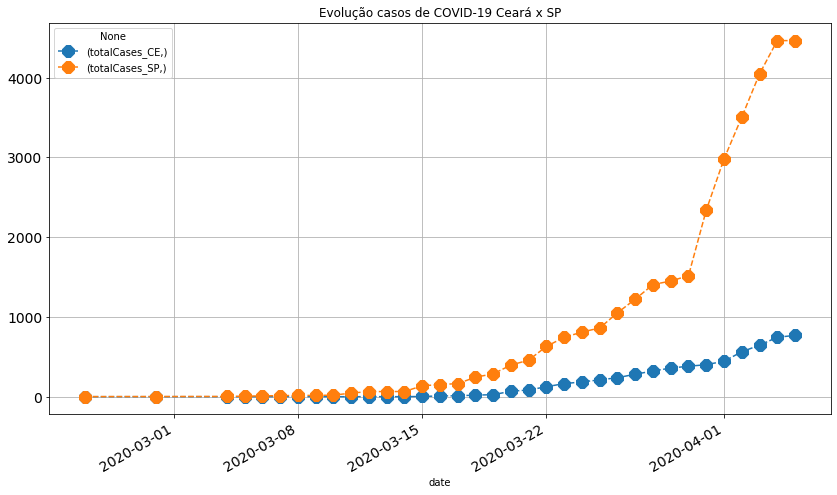

In [9]:
df.plot(style='8--', 
        mark_right=True,
        marker = "8",
        grid=True,
        markersize =12,
        figsize=(14,8), 
        fontsize=14,
        title='Evolução casos de COVID-19 Ceará x SP')

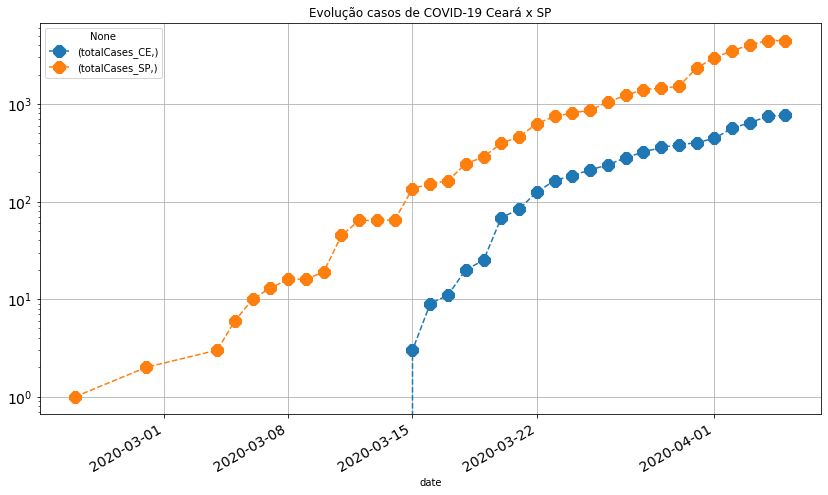

In [10]:
df.plot(style='8--', 
        mark_right=True,
        logy=True,
        marker = "8",
        grid=True,
        markersize =12,
        figsize=(14,8), 
        fontsize=14,
        title='Evolução casos de COVID-19 Ceará x SP')

#  Estados em transição para aceleração descontrolada do coronavírus

Segundo o Ministério da saúde, 4 estados mais o DF apresentam um quadro de aceleração descontrolado do COVID-19.

Os Estados junto com o o seu índice de incidência estão mostrados a seguir:

Nessas regiões, os Coeficientes de Incidência são:

1. Distrito Federal - 13,2/100 mil
2. São Paulo - 9,7/100 mil
3. Ceará - 6,8/100 mil
4. Rio de Janeiro - 6,2/100 mil
5. Amazonas - 6,2/100 mil

https://g1.globo.com/bemestar/coronavirus/noticia/2020/04/04/ministerio-da-saude-diz-que-4-estados-e-df-podem-estar-em-fase-de-transicao-para-aceleracao-descontrolada-de-coronavirus.ghtml

In [11]:
from covid19.data import load_cases
from matplotlib.pyplot import *
import matplotlib as mpl
mpl.style.use('seaborn')

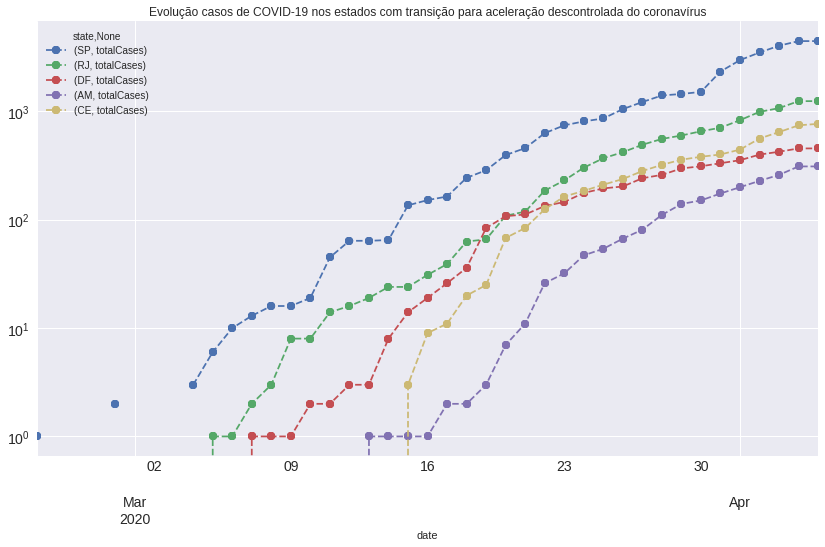

In [12]:
(load_cases('state')
 [[('SP', 'totalCases'), ('RJ', 'totalCases') ,
   ('DF', 'totalCases'), ('AM', 'totalCases'), 
   ('CE', 'totalCases')]]
 .asfreq('D')
 .plot(style='8--', 
        mark_right=True,
        logy=True,
        marker = "8",
        grid=True,
        markersize =8,
        figsize=(14,8), 
        fontsize=14,
        title='Evolução casos de COVID-19 nos estados com transição para aceleração descontrolada do coronavírus'))

### Evolução desde o dia com primeiro caso registrado em cada um desses estados

In [13]:
df = data.load_cases('state')
data_ceara = df['CE']
data_SP = df['SP']
data_RJ = df['RJ']
data_DF = df['DF']
data_AM = df['AM']

In [14]:
data_ceara.index = range(0, len(data_ceara))
data_SP.index = range(0, len(data_SP))
data_RJ.index = range(0, len(data_RJ))
data_DF.index = range(0, len(data_DF))
data_AM.index = range(0, len(data_AM))

In [15]:
days_case_zero_ce = data_ceara[data_ceara['totalCases'] == 0]
days_case_zero_sp = data_SP[data_SP['totalCases'] == 0]
days_case_zero_rj = data_RJ[data_RJ['totalCases'] == 0]
days_case_zero_df = data_DF[data_DF['totalCases'] == 0]
days_case_zero_am = data_AM[data_AM['totalCases'] == 0]

In [16]:
data_ceara = data_ceara.drop(days_case_zero_ce.index, axis=0)
data_SP = data_SP.drop(days_case_zero_sp.index, axis=0)
data_RJ = data_RJ.drop(days_case_zero_rj.index, axis=0)
data_DF = data_DF.drop(days_case_zero_df.index, axis=0)
data_AM = data_AM.drop(days_case_zero_am.index, axis=0)

In [17]:
data_ceara = data_ceara.reset_index()
data_SP = data_SP.reset_index()
data_RJ = data_RJ.reset_index()
data_DF = data_DF.reset_index()
data_AM = data_AM.reset_index()

data_ceara = data_ceara.drop(['index'], axis=1)
data_SP = data_SP.drop(['index'], axis=1)
data_RJ = data_RJ.drop(['index'], axis=1)
data_DF = data_DF.drop(['index'], axis=1)
data_AM = data_AM.drop(['index'], axis=1)

In [18]:
data_ceara.columns = [['newCases_CE', 'totalCases_CE']]
data_SP.columns    = [['newCases_SP', 'totalCases_SP']]
data_RJ.columns     = [['newCases_RJ', 'totalCases_RJ']]
data_DF.columns     = [['newCases_DF', 'totalCases_DF']]
data_AM.columns     = [['newCases_AM', 'totalCases_AM']]


In [19]:
df = pd.concat([data_ceara, data_SP, data_RJ, data_DF, data_AM], axis=1, sort=False)

In [20]:
df = df.drop(['newCases_CE', 'newCases_SP', 'newCases_RJ', 'newCases_DF', 'newCases_AM'], axis=1)

/home/personal-arthur/.local/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


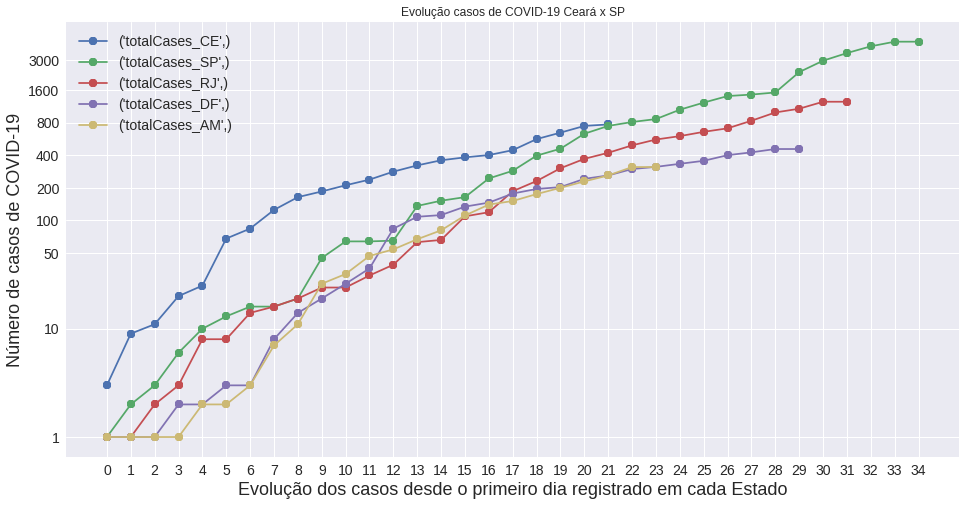

In [22]:
fig, ax = subplots()
df.plot(style='8-', 
        mark_right=True,
        logy=True,
        marker = "8",
        legend= True,
        grid=True,
        markersize = 8,
        figsize=(16,8), 
        fontsize=14,
        title='Evolução casos de COVID-19 Ceará x SP',
        ax=ax)

list_y_ticks = [1, 10, 50, 100, 200, 400, 800, 1600, 3000]

ax.set_yticklabels([],minor=True)
ax.set_yticks(list_y_ticks)
ax.set_yticklabels([str(i) for i in list_y_ticks])
ax.set_xticks(range(0,35))

plt.xlabel('Evolução dos casos desde o primeiro dia registrado em cada Estado', fontsize=18)
plt.ylabel('Número de casos de COVID-19', fontsize=18)
ax.legend(df.columns, fontsize=14);